# HW03

최재필

https://nbviewer.org/github/jaepil-choi/fbaquant23/blob/master/s1.2ap/hw/s1.2ap_hw03.ipynb

Solve the following problems

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, ks_2samp

from pathlib import Path

In [3]:
np.random.seed(123)

In [27]:
BASE_PATH = Path('.').resolve().parents[0]
BASE_PATH

WindowsPath('E:/VSCodeProjects/fbaquant23/s1.2ap')

In [11]:
# data_path = Path(__file__).resolve() / 'data' # Interactive shell에선 안된다. 
data_path = Path('.').resolve() / 'data'
data_path

WindowsPath('E:/VSCodeProjects/fbaquant23/s1.2ap/hw/data')

In [28]:
coursera_data_path = BASE_PATH / 'coursera' / 'Introduction to Portfolio Construction and Analysis with Python' / 'data'
coursera_data_path

WindowsPath('E:/VSCodeProjects/fbaquant23/s1.2ap/coursera/Introduction to Portfolio Construction and Analysis with Python/data')

## Problem 1

With the Coursera lecture: Introduction to Portfolio Construction and Analysis with Python, please replicate the code in the lab session of Week 1, analyzing returns.

### Lab Session-Basics of returns

https://www.coursera.org/learn/introduction-portfolio-construction-python/lecture/lLS6N/lab-session-basics-of-returns

In [7]:
prices_a = np.array([8.70, 8.91, 8.71])

In [9]:
prices_a[1:] / prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [30]:
sample_prices = pd.read_csv(coursera_data_path / 'sample_prices.csv')
sample_prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [39]:
returns = sample_prices.pct_change()
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


<AxesSubplot: >

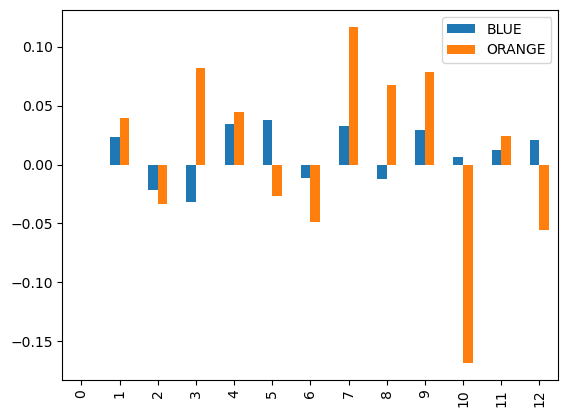

In [35]:
returns.plot.bar()

### Lab Session-Risk Adjusted returns

https://www.coursera.org/learn/introduction-portfolio-construction-python/lecture/PM6k4/lab-session-risk-adjusted-returns

In [36]:
# sample std를 구하는 것임. 
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [40]:
# 위 std 는 n-1로 나눠준 것이다. 직접 구한 population std 와는 그래서 값이 다르다. 

deviations = returns - returns.mean()
sqr_deviations = deviations ** 2
variance = sqr_deviations.mean()

std = np.sqrt(variance)
std

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [37]:
np.prod(returns + 1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [38]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [88]:
size_port_returns = pd.read_csv(
    coursera_data_path / 'Portfolios_Formed_on_ME_monthly_EW.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    na_values=-99.99
    )

size_port_returns.index = pd.to_datetime(size_port_returns.index, format='%Y%m')

# period로 바꿔줄 수 있다. 
size_port_returns.index = size_port_returns.index.to_period('M')

columns = [
    'Lo 10',
    'Hi 10',
]

size_port_returns = size_port_returns[columns]
size_port_returns.rename(
    columns={
        'Lo 10': 'SmallCap',
        'Hi 10': 'LargeCap',
        },
    inplace=True,
)

size_port_returns = size_port_returns / 100
size_port_returns

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253


In [97]:
type(size_port_returns.index)

pandas.core.indexes.period.PeriodIndex

In [96]:
# period로 바꿔줘서 이렇게 가능 

size_port_returns.loc['1975']

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


<AxesSubplot: >

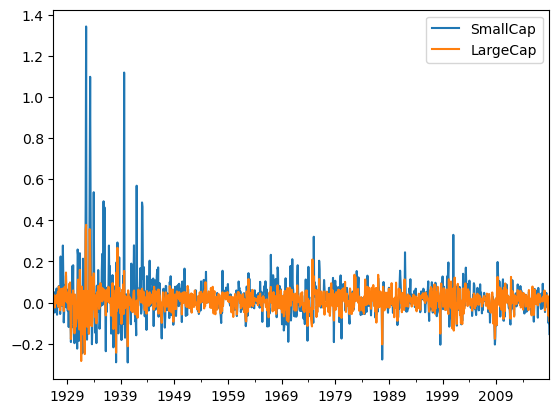

In [89]:
size_port_returns.plot.line()

In [90]:
annualized_std = size_port_returns.std() * np.sqrt(12)
annualized_std

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [91]:
total_return = (size_port_returns + 1).prod() - 1
total_return

SmallCap    1.659582e+06
LargeCap    3.674948e+03
dtype: float64

In [92]:
monthly_return = (total_return + 1) ** (1/len(size_port_returns)) - 1
monthly_return

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [93]:
annualized_return = (monthly_return + 1) ** 12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [94]:
# 한 번에 구할 수도 있다. 

annualized_return = (size_port_returns + 1).prod() ** (12/len(size_port_returns)) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

### Lab Session-Drawdown

https://www.coursera.org/learn/introduction-portfolio-construction-python/lecture/mksjU/lab-session-drawdown

1. Compute a wealth index (buy and hold)
2. Compute previous peaks
3. Compute drawdown (%) 

In [100]:
initial_holding = 1000
wealth_index = initial_holding * (size_port_returns['LargeCap'] + 1).cumprod()

<AxesSubplot: >

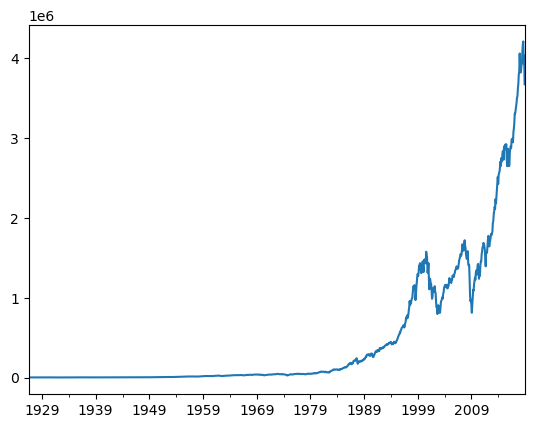

In [101]:
wealth_index.plot()

In [102]:
previous_peak = wealth_index.cummax()

<AxesSubplot: >

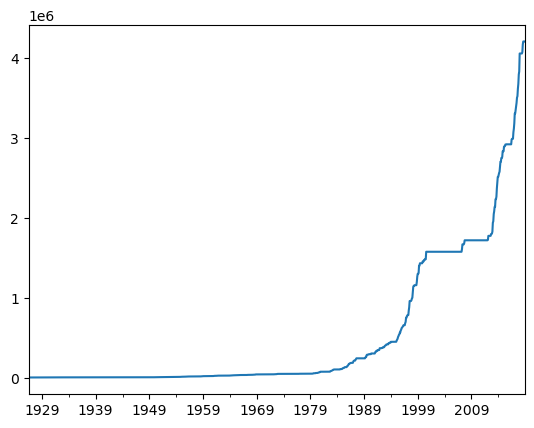

In [103]:
previous_peak.plot()

In [104]:
drawdown = (wealth_index - previous_peak) / previous_peak

<AxesSubplot: >

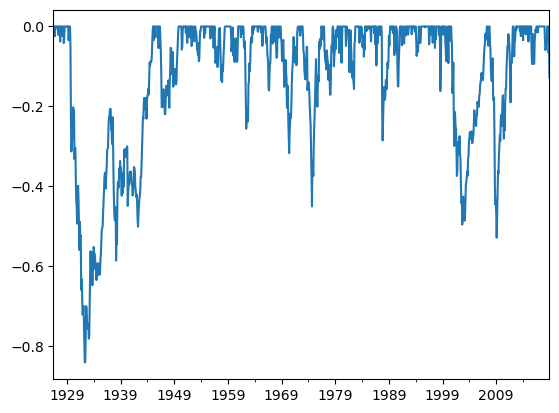

In [105]:
drawdown.plot()

In [109]:
# period index를 통해 slicing하여 1975년 이후의 mdd를 구하는 것. 

drawdown.loc['1975':].min()

-0.5280945042309304

In [107]:
# argmin 처럼 하되, index를 뱉어줌. 

drawdown.loc['1975':].idxmin()

Period('2009-02', 'M')

이제 Drawdown 함수를 구현해보자. 

In [111]:
def get_drawdown(
    return_series: pd.Series,
    initial_holding=1000,
    since_year=None,
    ) -> pd.Series:
    wealth_index = initial_holding * (return_series + 1).cumprod()
    previous_peak = wealth_index.cummax()
    drawdown = (wealth_index - previous_peak) / previous_peak

    if since_year:
        since_year = str(since_year)
        drawdown = drawdown.loc[since_year:]
    
    return drawdown

In [112]:
def get_MDD(drawdown: pd.Series):
    return drawdown.idxmin(), drawdown.min()


<AxesSubplot: >

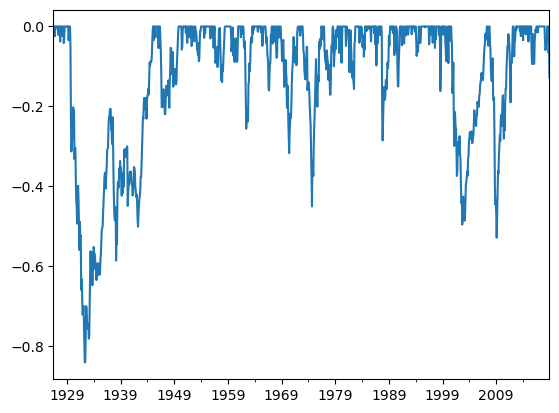

In [114]:
col_name = 'LargeCap'
drawdown = get_drawdown(size_port_returns.loc[:, col_name])

drawdown.plot()

In [116]:
mdd = get_MDD(drawdown)
mdd

(Period('1932-05', 'M'), -0.8400375277943123)

In [119]:
def get_drawdown_details(
    return_series: pd.Series,
    initial_holding=1000,
    since_year=None,
    ) -> pd.Series:
    wealth_index = initial_holding * (return_series + 1).cumprod()
    
    if since_year:
        since_year = str(since_year)
        wealth_index = wealth_index.loc[since_year:]

    previous_peak = wealth_index.cummax()
    drawdown = (wealth_index - previous_peak) / previous_peak
    
    df = pd.DataFrame({
        'wealth_index': wealth_index,
        'previous_peak': previous_peak,
        'drawdown': drawdown
    })

    return df

<AxesSubplot: >

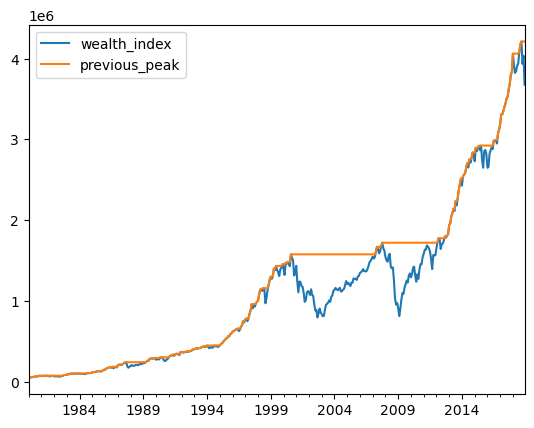

In [140]:
col_name = 'LargeCap'

drawdown_details = get_drawdown_details(
    size_port_returns.loc[:, col_name],
    since_year=1980,
    )

drawdown_details[['wealth_index', 'previous_peak']].plot()

In [141]:
get_MDD(drawdown_details['drawdown'])

(Period('2009-02', 'M'), -0.5280945042309304)

<AxesSubplot: >

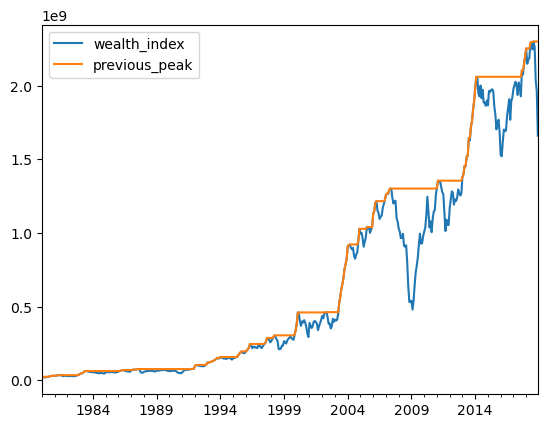

In [142]:
col_name = 'SmallCap'

drawdown_details = get_drawdown_details(
    size_port_returns.loc[:, col_name],
    since_year=1980,
    )

drawdown_details[['wealth_index', 'previous_peak']].plot()

In [143]:
get_MDD(drawdown_details['drawdown'])

(Period('2009-02', 'M'), -0.631206807725239)

## Problem 2

A pension fund manager analyzes the relationship between a specific asset and the market. First, he wants to show that the monthly returns of the biggest company are highly correlated with monthly market returns. (Let a risk-free rate be the interest rate of a Treasury bill with a 3-month maturity. 

You can download the data on FRED: https://fred.stlouisfed.org/series/TB3MS)


### a. 

Download the monthly excess returns(monthly return – risk-free rate) of Apple Inc. and S&P 500 from Jan 01, 2013, to Jan 01, 2023, using the `yfinance` library in python. And then, draw the scatter plot with Apple's monthly returns as dependent variables (y-axis) and the S&P 500 monthly returns as independent variables(x-axis). 


### b. 

Calculate the simple linear regression coefficient (alpha, beta) using the above data

$$ r_{apple} - r_{f} = \alpha + \beta(r_{snp500} - r_{f}) + \epsilon $$



### c. 

Test hypothesis $ H_{0}: \beta = 0, H_{1}: \beta > 0 $ for gradient $ \beta $ at a significance level of 5%.

## Problem 3

A Student majoring in finance wants to form an efficient frontier of a portfolio of the top five companies in market capitalization within the S&P 500. 


### a. 

Download the daily returns for the top five current market cap companies from Jan 1, 2018, to Jan 1, 2023.


### b. 

Find the average annual return (average daily return * 252) and the annual covariance matrix (covariance matrix with daily return * 252)


### c. 

Draw the following scatter plot of risk and returns using the Monte Carlo simulation. (trials: 20,000) 


### d. 

Find the point with the largest sharp ratio and draw the CAL. The risk-free rate is assumed to be 2%. 

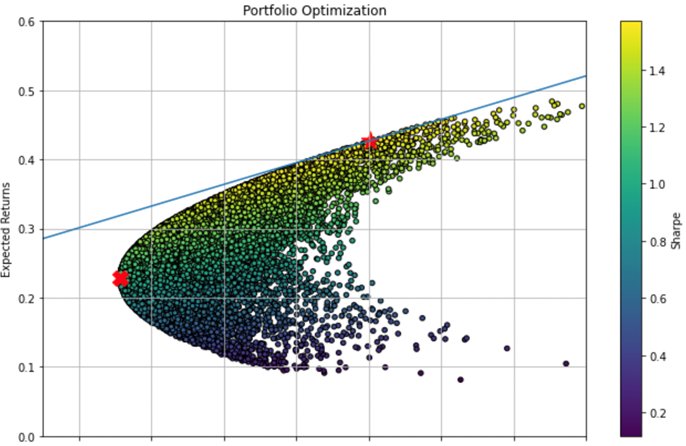

Hint

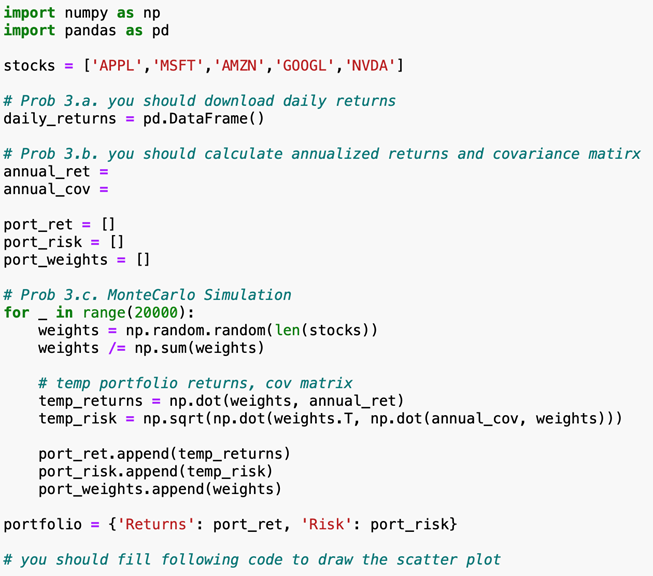